In [119]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.spatial.distance import cityblock
from scipy.special import softmax

In [120]:
def get_data_tsp():
    data = pd.read_csv("datasets/tsp.csv").values
    return data[:, 1:]

In [121]:
def f(arr):
    s = 0;
    for i in range(len(arr) - 1):
        s+=cityblock(arr[i], arr[i + 1])
    return s

In [122]:
def plot(arr):
    path = []
    for i in range(2 * len(arr) - 1):
        path.append([arr[i // 2][0], arr[i // 2 + i % 2][1]])
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1])
    plt.scatter(arr[:, 0], arr[:, 1])
    plt.show()

In [123]:
def crossover(a, b):
    ind = np.random.randint(len(a))
    pa, pb = [], []
    for i in range(len(b)):
        for y in a[ind:]:
            if (np.array_equal(b[i], y)):
                pa.append(b[i].copy())
    for i in range(len(a)):
        for y in b[ind:]:
            if (np.array_equal(a[i], y)):
                pb.append(a[i].copy())
    for i in range(len(a)-ind):
        a[ind+i] = pa[i].copy()
    for i in range(len(b)-ind):
        b[ind+i] = pb[i].copy()
    return a, b

def mutate(point):
    i = range(len(point))
    if (np.random.uniform() < 0.05):
        v1, v2 = np.random.choice(range(len(point)), 2)
        start = min(v1, v2)
        end = max(v1, v2)
        point[start: end] = point[start: end][::-1]
    return point
    

def genetic(points):
    population = np.array([np.random.permutation(points) for i in range(30)])
    lengths = np.array([f(population[i]) for i in range(30)])
    for i in range(10000):
        order = np.argsort(lengths)
        p1, p2 = crossover(population[order[0]], population[order[1]])
        p1, p2 = mutate(p1), mutate(p2)
        population[order[-1]],population[order[-2]] = p1, p2
        lengths = np.array([f(population[i]) for i in range(30)])
    order = np.argsort(lengths)
    return population[order[0]], lengths[order[0]]

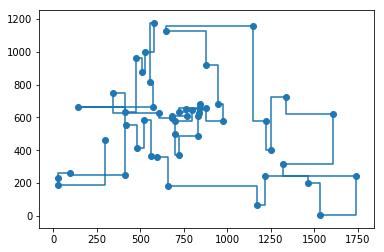

12770


In [124]:
points = get_data_tsp()
path, length= genetic(points)
plot(path)
print(length)